# Automatic reading of text in the image of a document

In this notebook, we will demonstrates step by step the process of automatically reading text from an image of a document using Optical Character Recognition (OCR) technology. The notebook first converts the image to grayscale and applies image processing techniques such as thresholding to enhance the quality of the image. Then, the OCR library such as Tesseract is utilized to orientate correctly the image and extract the text from the processed image. The extracted text is then displayed in the output cells of the Jupyter Notebook.

## 1.Package and module
Dependencies are availabe in [requirements.txt](requirements.txt) and [environment.yml](environment.yml)

In [1]:
%matplotlib inline
import os
import pytesseract
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from auto_read.processing import apply_blur_filter
from auto_read.processing import apply_otsu_threshold
from auto_read.corner_detection import detect_contour
from auto_read.corner_detection import detect_corners_from_contour
from auto_read.homography import get_target_plane_points
from auto_read.homography import unwarp
from auto_read.orientation import check_angle
from auto_read.orientation import rotate
from auto_read.utils import show_boxes_from_img

### 1.1 Path of your image and tesseract executable

In [2]:
path_to_your_image = r"C:\Python\auto-readable-doc\img\image4.jpg"
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

## 2. Loading image

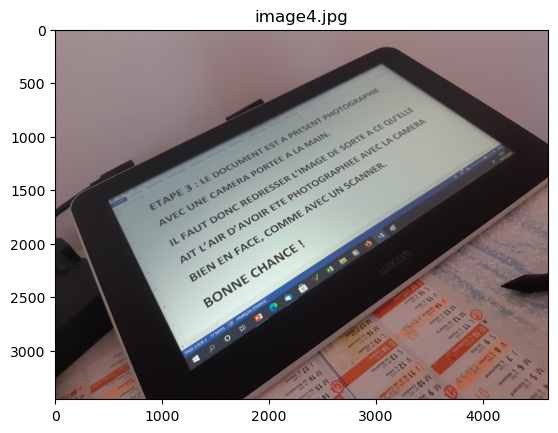

Shape for orignal img (RGB) : (3456, 4608, 3)


In [3]:
image = cv.imread(path_to_your_image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(os.path.basename(path_to_your_image))
plt.show()

print("Shape for orignal img (RGB) : " + str(image.shape))

## 3.Image processing
If your image is a screenshot skip to the [part 4](##4.Output)

### 3.1 Filter and threshold

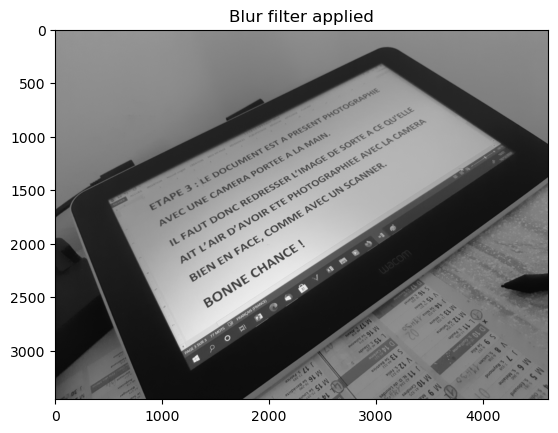

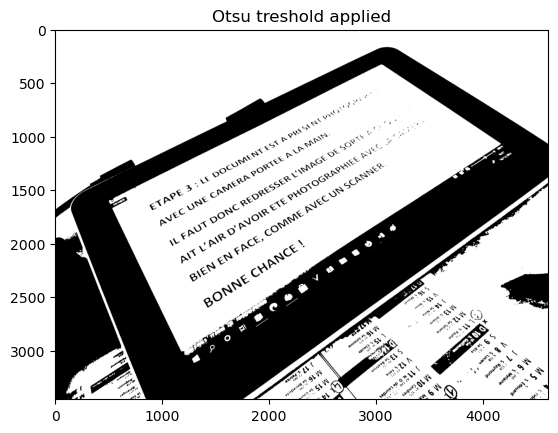

In [4]:
filtered_img = apply_blur_filter(image)
threshold_img = apply_otsu_threshold(filtered_img)

### 3.2 Contour and corner detection

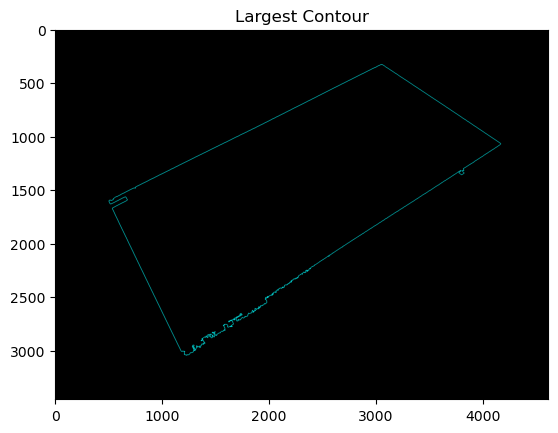

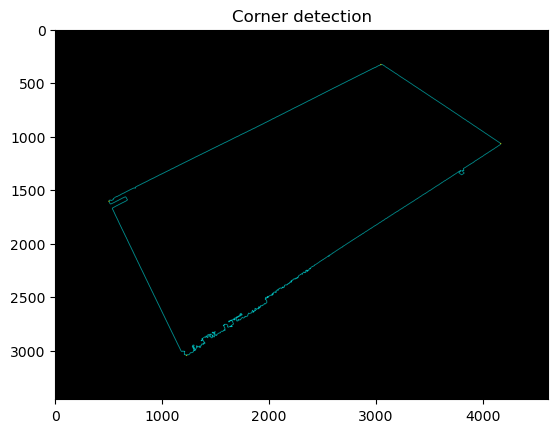

In [5]:
cnv, largest_contour = detect_contour(threshold_img, image.shape)
corners = detect_corners_from_contour(cnv, largest_contour)

### 3.3 Homographic transformation

In [6]:
target_plane_points, h, w = get_target_plane_points(corners)
src_points = np.float32(corners)
un_warped = unwarp(image, src_points, target_plane_points)
cropped_img = un_warped[int(0.05*h):int(0.95*h),int(0.05*w):int(0.95*w)]

### 3.4 Plot homgraphy tranformation (optional)

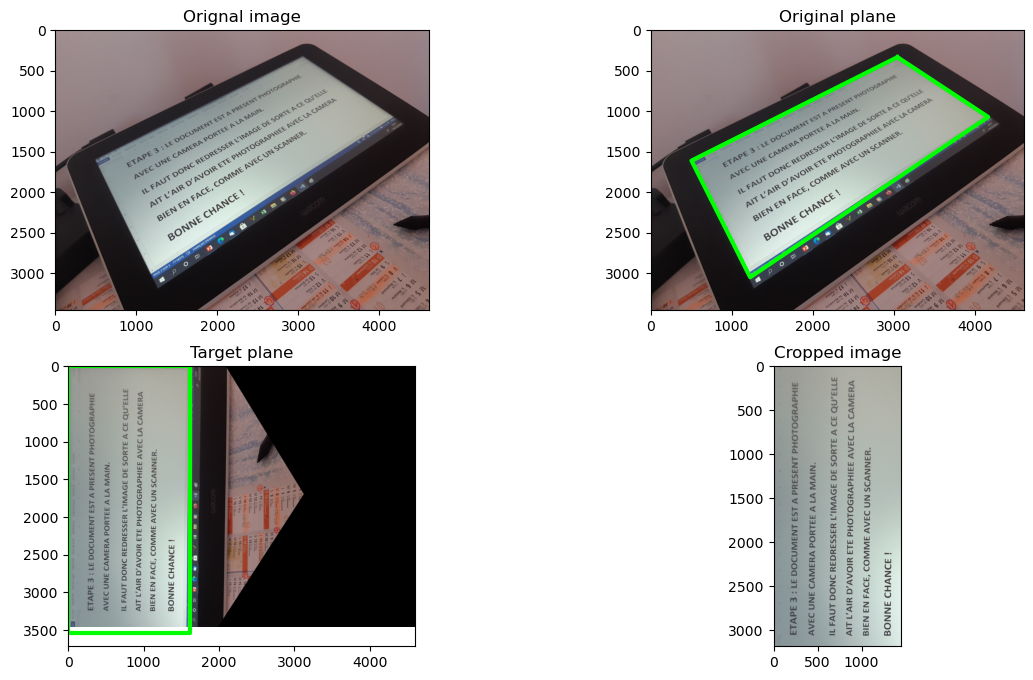

In [7]:
x = [src_points[0][0], src_points[2][0], src_points[3][0], src_points[1][0], src_points[0][0]]
y = [src_points[0][1], src_points[2][1], src_points[3][1], src_points[1][1], src_points[0][1]]

x_prime = [target_plane_points[0][0], target_plane_points[2][0], target_plane_points[3][0], target_plane_points[1][0], target_plane_points[0][0]]
y_prime = [target_plane_points[0][1], target_plane_points[2][1], target_plane_points[3][1], target_plane_points[1][1], target_plane_points[0][1]]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
fig.subplots_adjust(hspace=.2, wspace=.05)
ax1.imshow(image)
ax1.set_title('Orignal image')

ax2.imshow(image)
ax2.plot(x, y, color='#00ff00', linewidth=3)
ax2.set_ylim([image.shape[0], 0])
ax2.set_xlim([0, image.shape[1]])
ax2.set_title('Original plane')

ax3.imshow(un_warped)
ax3.plot(x_prime, y_prime, color='#00ff00', linewidth=3)
ax3.set_title('Target plane')

ax4.imshow(cropped_img)
ax4.set_title('Cropped image')
plt.show()

### 3.5 Check orientation of the text

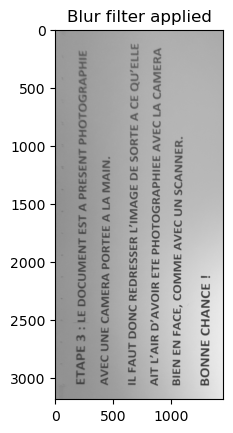

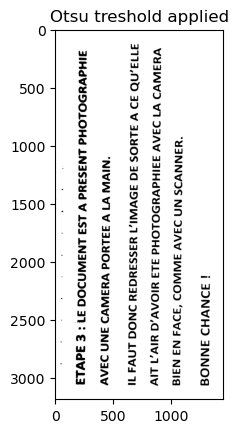

In [8]:
img_filtered = apply_blur_filter(cropped_img, 5)
img_tresh = apply_otsu_threshold(img_filtered)

Angle of rotation : 270


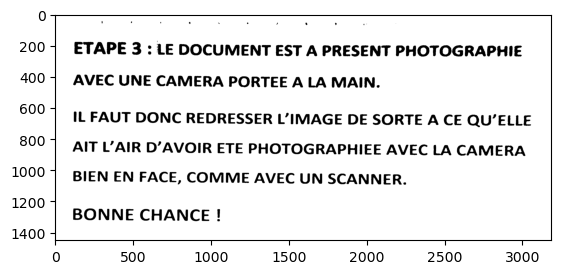

In [9]:
angle = check_angle(img_tresh)
print("Angle of rotation : " + str(angle))
image = rotate(img_tresh, angle)
plt.imshow(image, cmap='gray')
plt.show()

### 3.6 Show boxes from tesseract (optional)

In [ ]:
show_boxes_from_img(image)

## 4.Output

In [10]:
print(pytesseract.image_to_string(image=image))

Oe Ne ee

ETAPE 3 : LE DOCUMENT EST A PRESENT PHOTOGRAPHIE
AVEC UNE CAMERA PORTEE ALA MAIN.

IL FAUT DONC REDRESSER L’IMAGE DE SORTE A CE QU’ELLE
AIT L’AIR D’AVOIR ETE PHOTOGRAPHIEE AVEC LA CAMERA
BIEN EN FACE, COMME AVEC UN SCANNER.

BONNE CHANCE !

